<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/Covid_19_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
 **Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.**


**Guidelines:**

● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.


● Visualize the prediction by combining these technologies.


#Import required library

In [ ]:
# Import required library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
import plotly.express as px
import plotly.graph_objects as go


# Import covid data set using pandas

In [ ]:
df = pd.read_csv('/content/sample_data/covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


# Understanding the covid data set


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


# Data consist for how many days? 188 days

In [ ]:
len(df['Country/Region'].unique())

187

## Data consist for how many countries? 187 countries

In [ ]:
# rename columns Province/State and Country/Region to a relevant name

df.rename(columns={'Province/State':'State','Country/Region':'Country'}, inplace=True)
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


# Plotting the data of Confirmed, Active, Recovered, Deaths Record by dates using Plotly library.



In [ ]:
# Confirmed Cases
Confirmed_Cases =df.groupby('Date')['Confirmed'].sum().reset_index()
Confirmed_Cases


,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
# user can hover to the plot to see the data on respective date
fig=px.line(Confirmed_Cases, x=Confirmed_Cases['Date'],y =Confirmed_Cases['Confirmed'], title='Date VS Confirmed Cases')
fig.show()



*   It looks like there is a upward trend in each month.
*   Lowest confirmed cases in Feb 2020.
*   Highest confirmedcases in Jul 2020.










In [ ]:
# Active Cases
Active_Cases =df.groupby('Date')['Active'].sum().reset_index()
Active_Cases


,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [ ]:
# user can hover to the plot to see the data on respective date
fig=px.line(Active_Cases, x=Active_Cases['Date'],y =Active_Cases['Active'], title='Date VS Active Cases')
fig.show()


*   It looks like there is a upward trend in each month.
*   Lowest active cases in Feb 2020.
*   Highest active cases in Jul 2020.

In [ ]:
# Recovered Cases
Recovered_Cases =df.groupby('Date')['Recovered'].sum().reset_index()
Recovered_Cases


,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
# user can hover to the plot to see the data on respective date
fig=px.line(Recovered_Cases, x=Recovered_Cases['Date'],y =Recovered_Cases['Recovered'], title='Date VS Recovered Cases')
fig.show()



*   It looks like there is a upward trend in each month.
*   Lowest recovered cases in Feb 2020.
*   Highest recovered cases in Jul 2020.

In [ ]:
# Deaths_Cases
Deaths_Cases =df.groupby('Date')['Deaths'].sum().reset_index()
Deaths_Cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
# user can hover to the plot to see the data on respective date
fig=px.line(Deaths_Cases, x=Deaths_Cases['Date'],y =Deaths_Cases['Deaths'], title='Date VS Death Cases')
fig.show()

*   It looks like there is a upward trend in each month.
*   Lowest death cases in Feb 2020.
*   Highest death cases in Jul 2020.

# Combing the result and plotting it in a single plot to see the trends

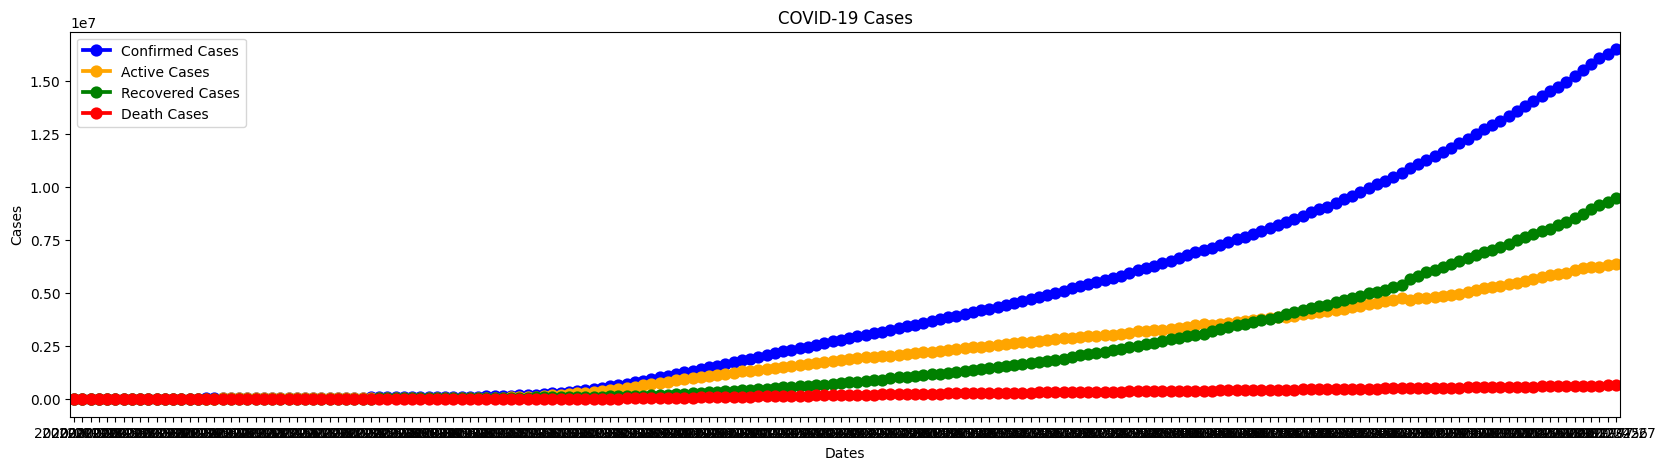

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("COVID-19 Cases")
sns.pointplot(Confirmed_Cases, x='Date', y='Confirmed', color='Blue' , label='Confirmed Cases')
sns.pointplot(Active_Cases, x='Date', y='Active', color='Orange', label='Active Cases')
sns.pointplot(Recovered_Cases, x='Date', y='Recovered', color='Green', label='Recovered Cases')
sns.pointplot(Deaths_Cases, x='Date', y='Deaths', color='Red', label='Death Cases')
plt.show()

# Analysis

*   From the data confirmed cases are more than death cases.
*   Death cases are stable for couple of months however it is increasing as the number of confirmed and active cases are increasing.




# Analysis the data country wise which are most affected.


*   USA
*   China
*   India






In [ ]:
# Date wise cases in USA with 'Confirmed', 'Active', 'Recovered', 'Deaths' status.
df_USA= df[df['Country']=='US'].groupby('Date')[['Confirmed', 'Active', 'Recovered', 'Deaths']].sum().reset_index()
df_USA

,Date,Confirmed,Active,Recovered,Deaths
0,2020-01-22,1,1,0,0
1,2020-01-23,1,1,0,0
2,2020-01-24,2,2,0,0
3,2020-01-25,2,2,0,0
4,2020-01-26,5,5,0,0
...,...,...,...,...,...
183,2020-07-23,4038816,2661117,1233269,144430
184,2020-07-24,4112531,2705347,1261624,145560
185,2020-07-25,4178970,2753091,1279414,146465
186,2020-07-26,4233923,2789125,1297863,146935


In [ ]:
# Date wise cases in China with 'Confirmed', 'Active', 'Recovered', 'Deaths' status.
df_China= df[df['Country']=='China'].groupby('Date')[['Confirmed', 'Active', 'Recovered', 'Deaths']].sum().reset_index()
df_China

,Date,Confirmed,Active,Recovered,Deaths
0,2020-01-22,548,503,28,17
1,2020-01-23,643,595,30,18
2,2020-01-24,920,858,36,26
3,2020-01-25,1406,1325,39,42
4,2020-01-26,2075,1970,49,56
...,...,...,...,...,...
183,2020-07-23,86045,2695,78701,4649
184,2020-07-24,86202,2807,78745,4650
185,2020-07-25,86381,2916,78813,4652
186,2020-07-26,86570,3056,78862,4652


In [ ]:
# Date wise cases in India with 'Confirmed', 'Active', 'Recovered', 'Deaths' status.
df_India= df[df['Country']=='India'].groupby('Date')[['Confirmed', 'Active', 'Recovered', 'Deaths']].sum().reset_index()
df_India

,Date,Confirmed,Active,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,440298,817209,30601
184,2020-07-24,1337024,456234,849432,31358
185,2020-07-25,1385635,468002,885573,32060
186,2020-07-26,1435616,485277,917568,32771


# Comparing the confirmed cases of 3 countries. USA, China and India.

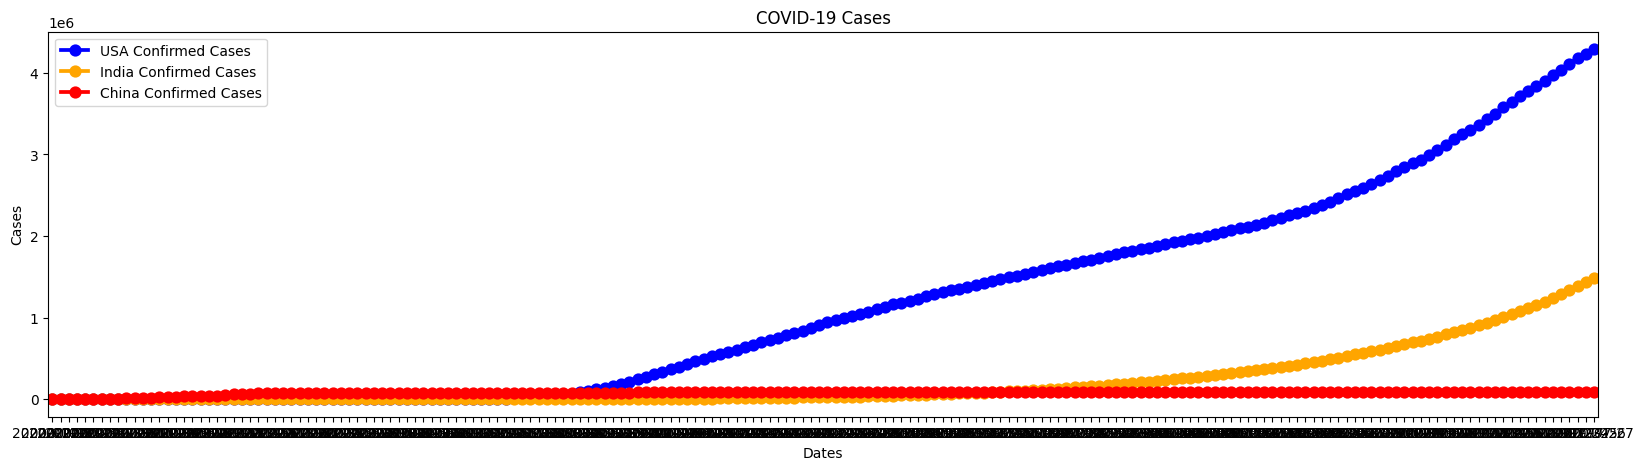

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("COVID-19 Cases")
sns.pointplot(df_USA, x='Date', y='Confirmed', color='Blue' , label='USA Confirmed Cases')
sns.pointplot(df_India, x='Date', y='Confirmed', color='Orange' , label='India Confirmed Cases')
sns.pointplot(df_China, x='Date', y='Confirmed', color='Red' , label='China Confirmed Cases')
plt.show()

# Comparision between the Active Cases between the countires USA, India and China.

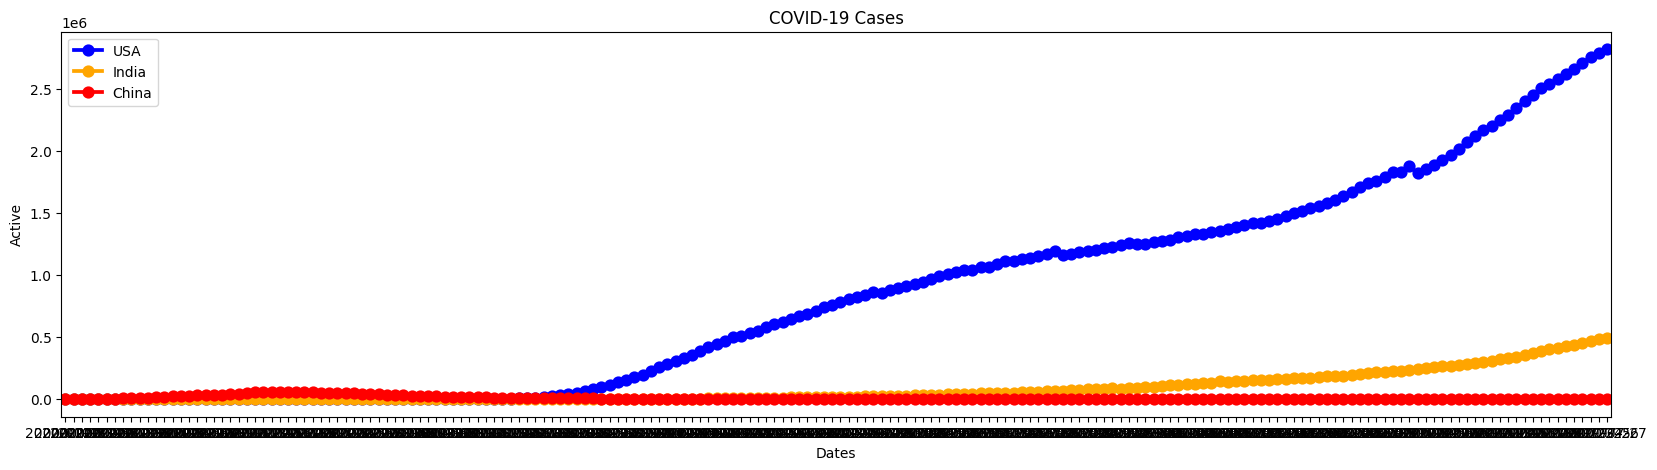

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel("Dates")
plt.ylabel("Active")
plt.title("COVID-19 Cases")
sns.pointplot(df_USA, x='Date', y='Active', color='Blue' , label='USA')
sns.pointplot(df_India, x='Date', y='Active', color='Orange' , label='India')
sns.pointplot(df_China, x='Date', y='Active', color='Red' , label='China')
plt.show()

# Comparision between the Recovered Cases between the countires USA, India and China.

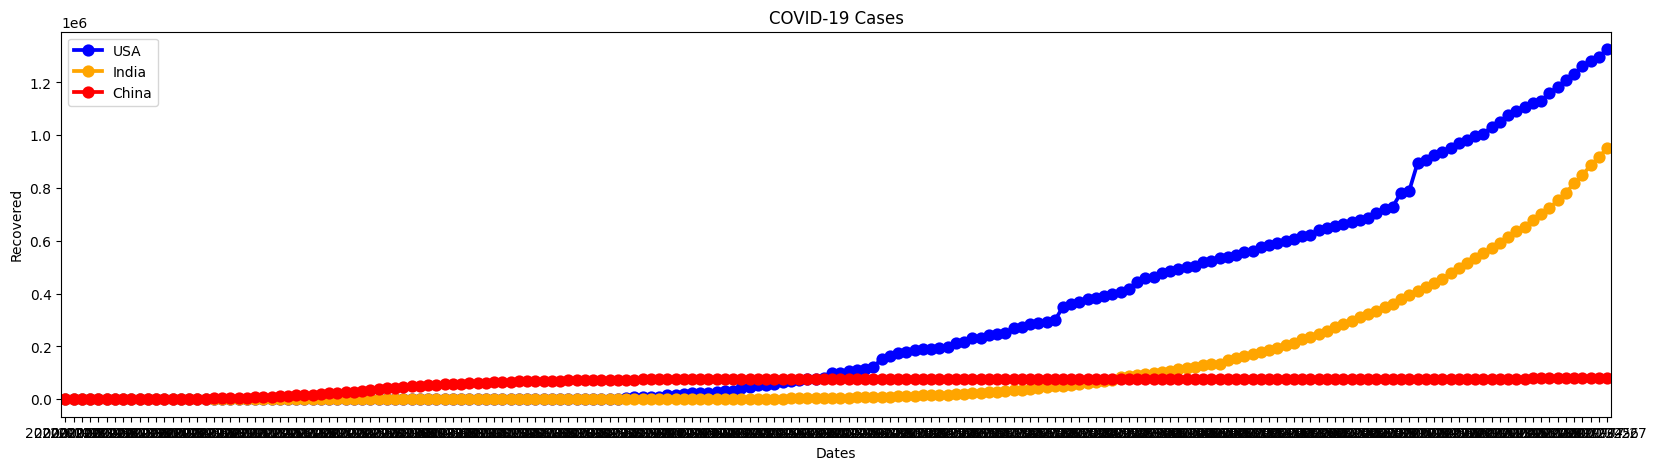

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel("Dates")
plt.ylabel("Recovered")
plt.title("COVID-19 Cases")
sns.pointplot(df_USA, x='Date', y='Recovered', color='Blue' , label='USA')
sns.pointplot(df_India, x='Date', y='Recovered', color='Orange' , label='India')
sns.pointplot(df_China, x='Date', y='Recovered', color='Red' , label='China')
plt.show()

# Comparision between the Death Cases between the countires USA, India and China.

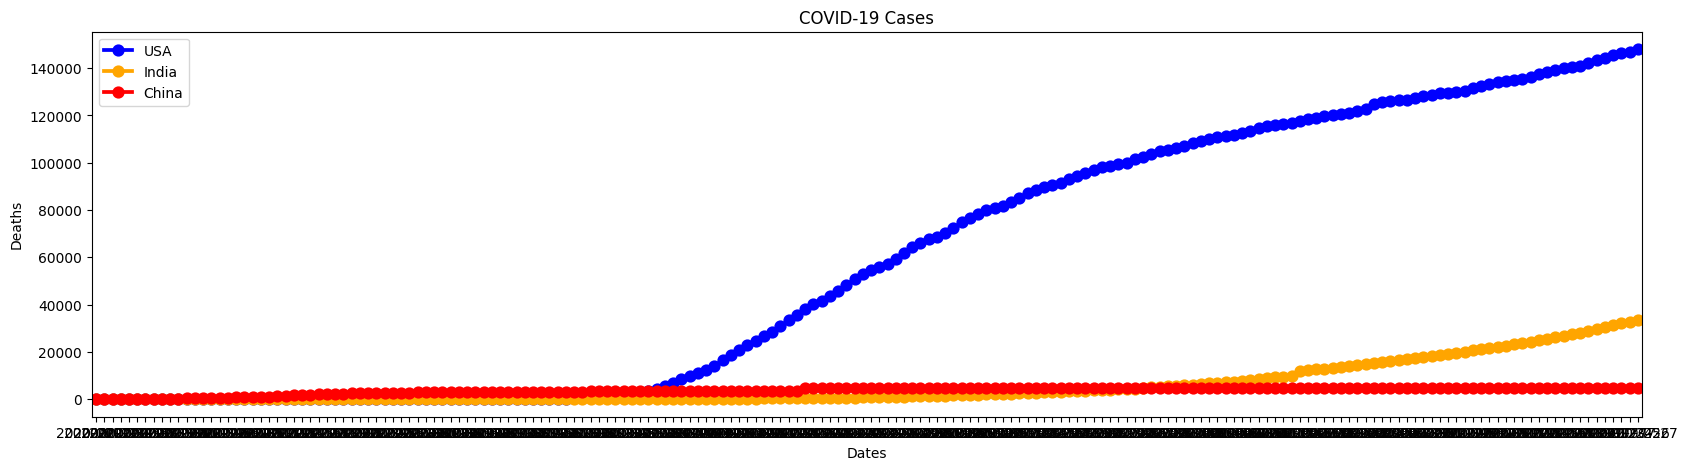

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title("COVID-19 Cases")
sns.pointplot(df_USA, x='Date', y='Deaths', color='Blue' , label='USA')
sns.pointplot(df_India, x='Date', y='Deaths', color='Orange' , label='India')
sns.pointplot(df_China, x='Date', y='Deaths', color='Red' , label='China')
plt.show()

# Use plotly to plot the covid data on world maps.


In [ ]:
world_covid_data = df.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
world_covid_data

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [ ]:
fig = px.choropleth(world_covid_data, locations='Country',locationmode='country names',color='Confirmed',range_color=[0,10000],color_continuous_scale='reds',title='Visualizing world map for the confirmed casses')
fig.show()

In [ ]:
fig = px.choropleth(world_covid_data, locations='Country',locationmode='country names',color='Active',range_color=[0,10000],color_continuous_scale='reds',title='Visualizing world map for the active casses')
fig.show()

In [ ]:
fig = px.choropleth(world_covid_data, locations='Country',locationmode='country names',color='Recovered',range_color=[0,10000],color_continuous_scale='reds',title='Visualizing world map for the recovered casses')
fig.show()

In [ ]:
fig = px.choropleth(world_covid_data, locations='Country',locationmode='country names',color='Deaths',range_color=[0,10000],color_continuous_scale='reds',title='Visualizing world map for the death casses')
fig.show()

# **Model Building using Facebook prophet library.**

In [ ]:
# install facebook prophet library

!pip install prophet


In [ ]:
# import library
from prophet import Prophet


In [ ]:
# Renaming the columns of the confirmed cases
Confirmed_Cases = Confirmed_Cases.rename(columns={'Date':'ds','Confirmed':'y'})
Confirmed_Cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
# Model fitting and training
model = Prophet()
model.fit(Confirmed_Cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/x438pz2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/0qtibi5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52029', 'data', 'file=/tmp/tmpl99m_gcy/x438pz2h.json', 'init=/tmp/tmpl99m_gcy/0qtibi5i.json', 'output', 'file=/tmp/tmpl99m_gcy/prophet_modelvknniqn1/prophet_model-20250702115052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Future Prediction of the confrimed case data for the next 30 days

In [ ]:
# Future Prediction of the Data.
future_data = model.make_future_dataframe(periods=30)
forecasted_confirmed = model.predict(future_data)
forecasted_confirmed

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.286209e+05,8.083487e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.118965e+05,9.933085e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.030536e+05,1.088143e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.305138e+04,1.208716e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.003035e+05,1.157573e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.143681e+07,2.106282e+07,2.181349e+07,2.107756e+07,2.179714e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,2.145056e+07
214,2020-08-23,2.164080e+07,2.125209e+07,2.204288e+07,2.125918e+07,2.202603e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,2.164810e+07
215,2020-08-24,2.184479e+07,2.141213e+07,2.225442e+07,2.143867e+07,2.225117e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,2.184268e+07
216,2020-08-25,2.204878e+07,2.158946e+07,2.246969e+07,2.161559e+07,2.247591e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,2.203193e+07


# Displaying the forecasting data for confirmed cases



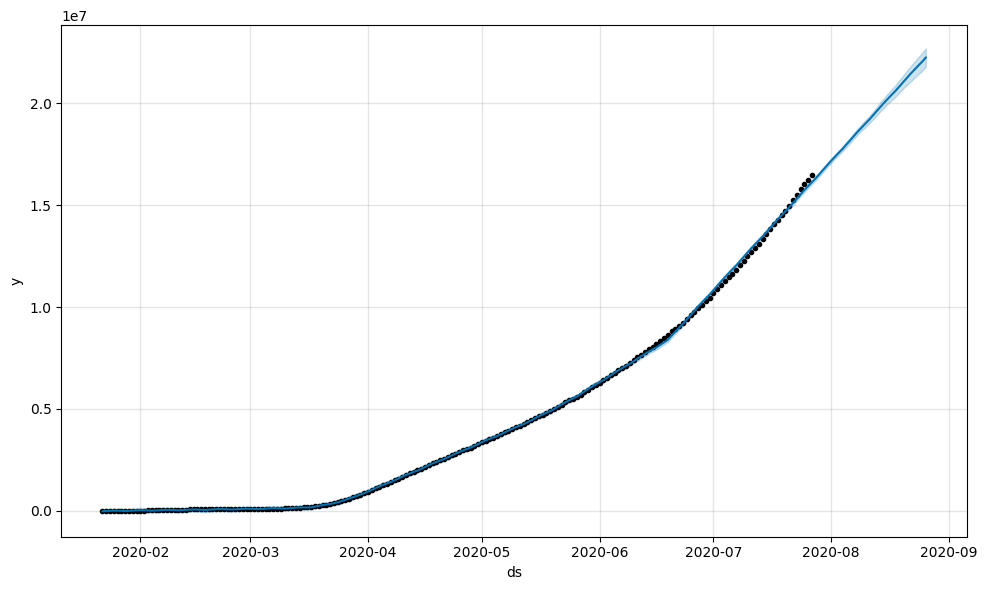

In [ ]:
model.plot(forecasted_confirmed)
plt.show()
# here blue line is showing the forecasted data for next 30 days.




**Active Cases forecasting**

In [ ]:
Active_Cases = Active_Cases.rename(columns={'Date':'ds','Active':'y'})
Active_Cases

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


# Forecasting the Active Case data for the next 30 days and training the data

In [ ]:
model1 = Prophet()
model1.fit(Active_Cases)

forecasting_active = model1.make_future_dataframe(periods=30)
forecasted_active = model1.predict(forecasting_active)
forecasted_active

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/axu41lm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/ahum2nko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82839', 'data', 'file=/tmp/tmpl99m_gcy/axu41lm4.json', 'init=/tmp/tmpl99m_gcy/ahum2nko.json', 'output', 'file=/tmp/tmpl99m_gcy/prophet_modeld4r10a5x/prophet_model-20250702115052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.051890e+02,-5.160402e+04,3.997880e+04,-5.051890e+02,-5.051890e+02,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,0.0,0.0,0.0,-6.240003e+03
1,2020-01-23,1.357199e+03,-4.739164e+04,4.390619e+04,1.357199e+03,1.357199e+03,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,0.0,0.0,0.0,-1.186216e+03
2,2020-01-24,3.219587e+03,-3.904892e+04,5.175324e+04,3.219587e+03,3.219587e+03,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,0.0,0.0,0.0,6.450374e+03
3,2020-01-25,5.081975e+03,-3.531565e+04,5.291882e+04,5.081975e+03,5.081975e+03,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,8.209979e+03
4,2020-01-26,6.944363e+03,-3.119488e+04,6.206762e+04,6.944363e+03,6.944363e+03,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,1.509628e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,7.915967e+06,7.745071e+06,8.097558e+06,7.745328e+06,8.088694e+06,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,7.919095e+06
214,2020-08-23,7.978235e+06,7.800166e+06,8.174503e+06,7.795309e+06,8.161027e+06,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,7.986387e+06
215,2020-08-24,8.040502e+06,7.843560e+06,8.239004e+06,7.847662e+06,8.235840e+06,-365.530371,-365.530371,-365.530371,-365.530371,-365.530371,-365.530371,0.0,0.0,0.0,8.040137e+06
216,2020-08-25,8.102770e+06,7.892385e+06,8.309844e+06,7.897442e+06,8.307252e+06,-5866.946694,-5866.946694,-5866.946694,-5866.946694,-5866.946694,-5866.946694,0.0,0.0,0.0,8.096903e+06


# Plotting Active Case Prediction

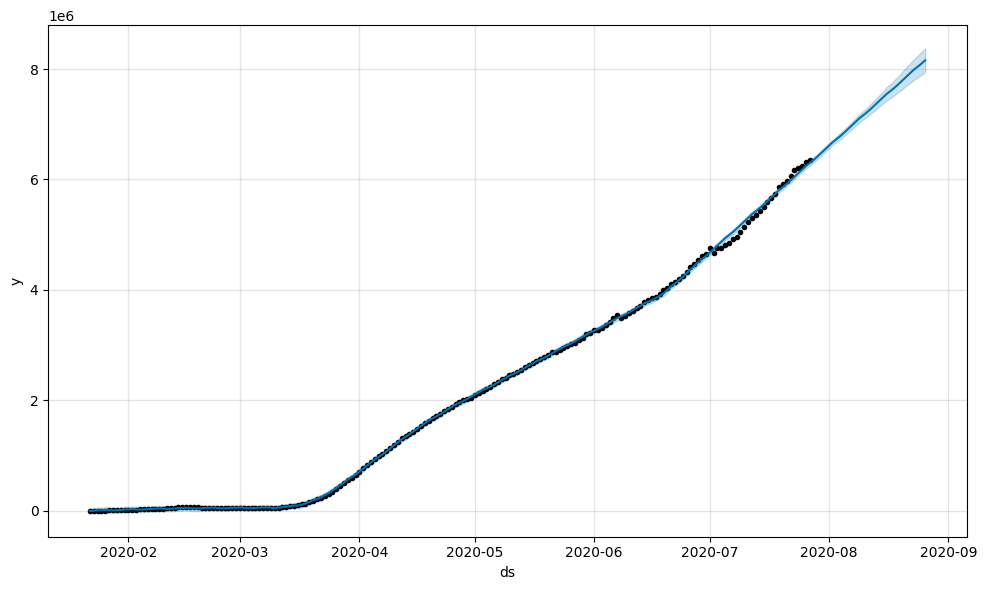

In [ ]:
model1.plot(forecasted_active)
plt.show()

# Future Prediction of the recovered case data for the next 30 days

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/8962aldr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/nltcj4n8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47712', 'data', 'file=/tmp/tmpl99m_gcy/8962aldr.json', 'init=/tmp/tmpl99m_gcy/nltcj4n8.json', 'output', 'file=/tmp/tmpl99m_gcy/prophet_modelu9oonu01/prophet_model-20250702115053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


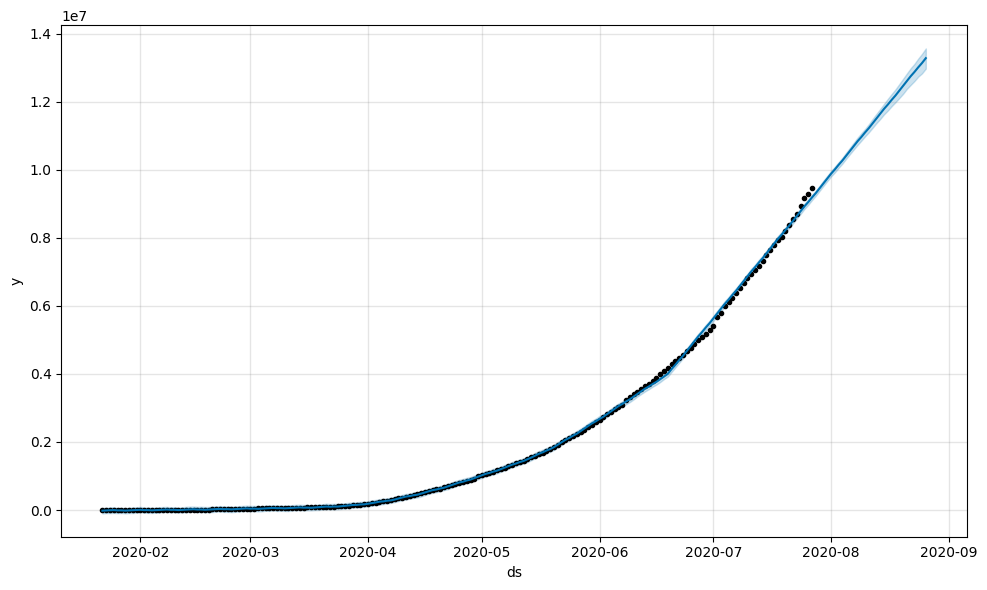

In [ ]:
Recovered_Cases = Recovered_Cases.rename(columns={'Date':'ds','Recovered':'y'})
model2 = Prophet()
model2.fit(Recovered_Cases)
forecasting_recovered_Cases = model2.make_future_dataframe(periods=30)
forecasted_recovered_Cases = model2.predict(forecasting_recovered_Cases)
model2.plot(forecasted_recovered_Cases)
plt.show()

# Forecasting Death Records for the next 30 days


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/tlp3p0tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/e1ozctb_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5614', 'data', 'file=/tmp/tmpl99m_gcy/tlp3p0tr.json', 'init=/tmp/tmpl99m_gcy/e1ozctb_.json', 'output', 'file=/tmp/tmpl99m_gcy/prophet_modelforjwlsa/prophet_model-20250702115053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


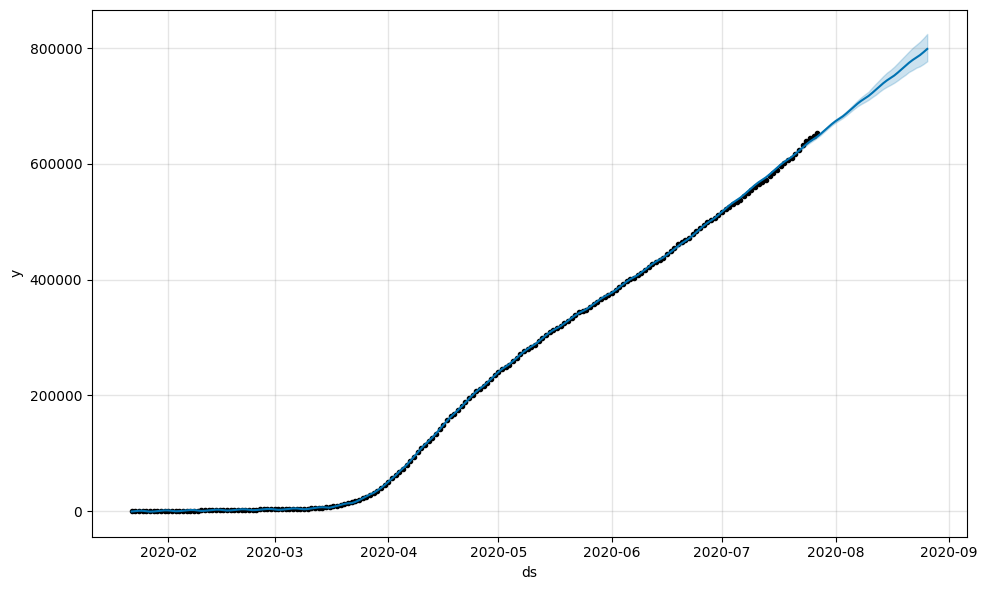

In [ ]:
Deaths_Cases = Deaths_Cases.rename(columns={'Date':'ds','Deaths':'y'})
model = Prophet()
model.fit(Deaths_Cases)
forecasting_death_Cases = model.make_future_dataframe(periods=30)
forecasted_death_Cases = model.predict(forecasting_death_Cases)
model.plot(forecasted_death_Cases)
plt.show()

# Plotting the prediction of the data in single graph

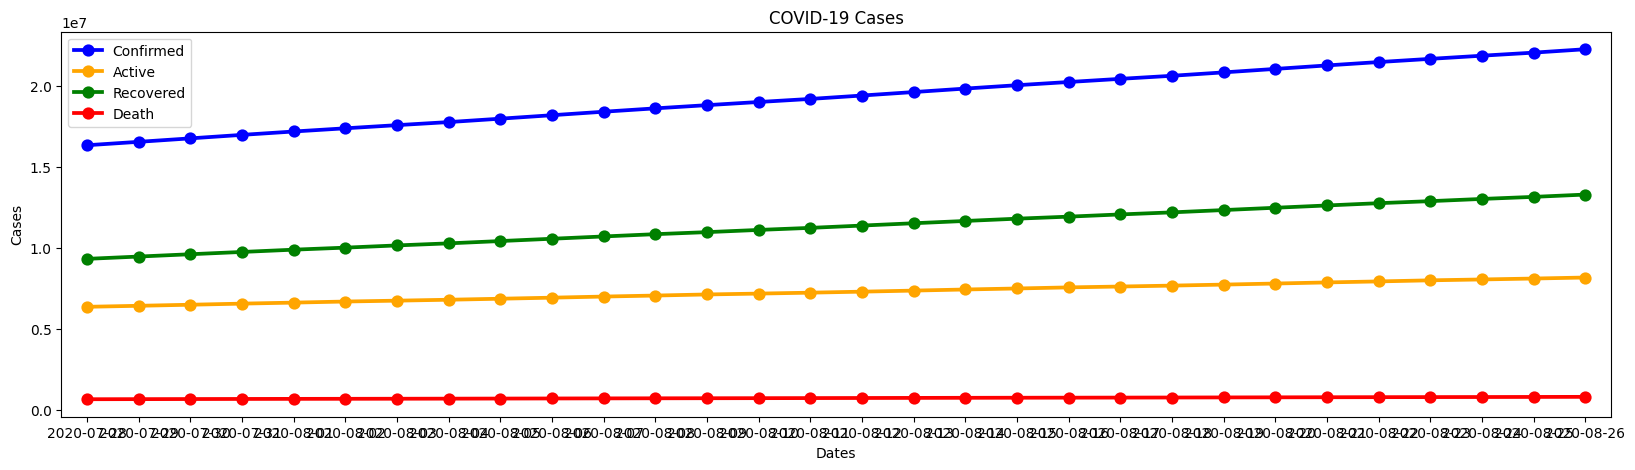

In [ ]:
plt.figure(figsize=(20,5))
for_confirmed= forecasted_confirmed.tail(30)
for_active = forecasted_active.tail(30)
for_recovered= forecasted_recovered_Cases.tail(30)
for_death= forecasted_death_Cases.tail(30)
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("COVID-19 Cases")
sns.pointplot(for_confirmed,x='ds',y='yhat',color='blue',label='Confirmed')
sns.pointplot(for_active,x='ds',y='yhat',color='orange',label='Active')
sns.pointplot(for_recovered,x='ds',y='yhat',color='green',label='Recovered')
sns.pointplot(for_death,x='ds',y='yhat',color='red',label='Death')
plt.legend()
plt.show()

# As per the forcastign of the data for the next 30 days below are the learning

* First week confirmed cases will increase.
*   Death cases will be steady but not observed on mid of the month
*   There will be increase in recovery.
*   Active cases are also increasing
*   Confirmed cases always greater than active, confirmed and death rate.










# Confirmed cases data with lower and upper bound for next 7 days

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/wl7kkook.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl99m_gcy/xb2chunf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40462', 'data', 'file=/tmp/tmpl99m_gcy/wl7kkook.json', 'init=/tmp/tmpl99m_gcy/xb2chunf.json', 'output', 'file=/tmp/tmpl99m_gcy/prophet_modeliqwlblpb/prophet_model-20250702115054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


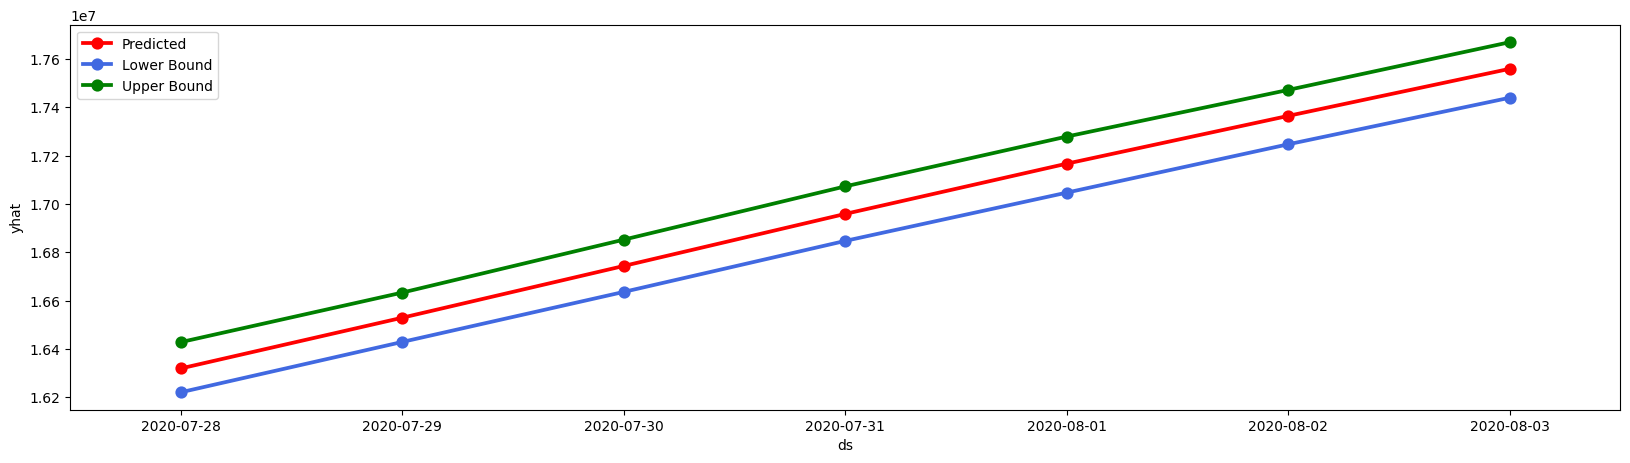

In [ ]:
Confirmed_Cases = Confirmed_Cases.rename(columns={'Date':'ds','Deaths':'y'})
model = Prophet()
model.fit(Confirmed_Cases)
forecasted_confirmed = model.make_future_dataframe(periods=7)
forecasted_confirmed = model.predict(forecasted_confirmed)
forecasted_confirmed= forecasted_confirmed.tail(7)
plt.figure(figsize=(20,5))
sns.pointplot(forecasted_confirmed,x='ds',y='yhat',color='red',label='Predicted')
sns.pointplot(forecasted_confirmed,x='ds',y='yhat_lower',color='royalblue',label='Lower Bound')
sns.pointplot(forecasted_confirmed,x='ds',y='yhat_upper',color='green',label='Upper Bound')
plt.legend()
plt.show()